In [1]:
import datajoint as dj
import numpy as np
import time

import pandas as pd
import seaborn as sns
sns.set() #sets the asethetics parameters in what set

In [2]:
#setting the address and the username
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config['safemode']=True
dj.config["display.limit"] = 20

schema = dj.schema('microns_pinky')
pinky = dj.create_virtual_module('pinky', 'microns_pinky')


Connecting celiib@10.28.0.34:3306


In [3]:
#NeuriteTargets was recomputed from the NeuriteRevised list
len(pinky.NeuriteTargetsRevised() & "spine_num<total"),len(pinky.NeuriteTargetsRevised() )

(30088, 30089)

# Does the HISTOGRAM FOR THE COMPARTMENTS

In [4]:
pinky.NeuriteTargetsRevised()

segmentation segmentation id,segment_id segment id unique within each Segmentation,apical_num total number of apicals synapsis for neurite,apical_prop perc of total number of apicals synapsis for neurite,apical_spine_prop perc of apical synapses that are apical spine synapses,apical_spine_head_prop perc of apical synapses that are apical spine head synapses,apical_spine_neck_prop perc of apical synapses that are apical spine neck synapses,apical_shaft_prop perc of apical synapses that are apical shaft synapses,basal_num total number of basal synapsis for neurite,basal_prop perc of total number of basal synapsis for neurite,basal_spine_prop perc of basal synapses that are basal spine synapses,basal_spine_head_prop perc of basal synapses that are basal spine head synapses,basal_spine_neck_prop perc of basal synapses that are basal spine neck synapses,basal_shaft_prop perc of basal synapses that are basal shaft synapses,oblique_num total number of oblique synapsis for neurite,oblique_prop perc of total number of oblique synapsis for neurite,oblique_spine_prop perc of oblique synapses that are oblique spine synapses,oblique_spine_head_prop perc of oblique synapses that are oblique spine head synapses,oblique_spine_neck_prop perc of oblique synapses that are oblique spine neck synapses,oblique_shaft_prop perc of oblique synapses that are oblique shaft synapses,dendrite_num total number of dendrite synapsis for neurite,dendrite_prop perc of total number of dendrite synapsis for neurite,dendrite_spine_prop perc of dendrite synapses that are dendrite spine synapses,dendrite_spine_head_prop perc of dendrite synapses that are dendrite spine head synapses,dendrite_spine_neck_prop perc of dendrite synapses that are dendrite spine neck synapses,dendrite_shaft_prop perc of dendrite synapses that are dendrite shaft synapse,soma_num total number of soma synapsis for neurite,soma_prop perc of total number of soma synapsis for neurite,soma_non_spine_prop perc of total number of soma non_spine synapse,axon_num total number of axon synapsis for neurite,axon_prop perc of total number of axon synapsis for neurite,axon_non_spine_prop perc of total number of axon non_spine synapse,distal_num total number of distal synapsis for neurite,distal_prop perc of total number of distal synapsis for neurite,distal_non_spine_prop perc of total number of distal non_spine synapse,cilia_num total number of cilia synapsis for neurite,cilia_prop perc of total number of cilia synapsis for neurite,cilia_non_spine_prop perc of total number of cilia non_spine synapse,spine_num total number of spine synapsis for neurite,spine_prop perc of total number of spine synapsis for neurite,spine_head_num total number of spine head synapsis for neurite,spine_head_prop perc of total number of spine head synapsis for neurite,spine_neck_num total number of spine neck synapsis for neurite,spine_neck_prop perc of total number of spine neck synapsis for neurite,shaft_num total number of shaft synapsis for neurite,shaft_prop perc of total number of shaft synapsis for neurite,non_spine_num total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),non_spine_prop perc of total number of non-spinable synapsis (aka not on apic/dendr/basal/oblique),total total number of synapsis for neurite
3,648518346341351467,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.8,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,648518346341351503,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.75,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.25,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.25,3.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,648518346341351508,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.5,0.0,0.166667,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,0.166667,2.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.166667,0.0,0.0,5.0,0.833333,0.0,0.0,6.0
3,648518346341351509,1.0,0.125

In [6]:
#creates the table with spine data without the spine label
#how to filter out the spine proportion

#have to first remove the ones that have only spine synapses


neurite_targets_no_spine = (pinky.NeuriteTargetsRevised()).proj("apical_prop","basal_prop","oblique_prop")
                                            

neurite_targets_no_spine



segmentation segmentation id,segment_id segment id unique within each Segmentation,apical_prop perc of total number of apicals synapsis for neurite,basal_prop perc of total number of basal synapsis for neurite,oblique_prop perc of total number of oblique synapsis for neurite
3,648518346341351467,0.0,0.8,0.0
3,648518346341351503,0.0,0.75,0.0
3,648518346341351508,0.0,0.5,0.0
3,648518346341351509,0.125,0.625,0.125
3,648518346341351514,0.0,0.9,0.0
3,648518346341351518,0.0,0.714286,0.0
3,648518346341351523,0.2,0.4,0.0
3,648518346341351525,0.0,0.666667,0.166667
3,648518346341351526,0.0,0.2,0.0
3,648518346341351531,0.0,1.0,0.0


In [7]:
#different lengths based on the number of synapses threshold

print(len(neurite_targets_no_spine))
print(len(neurite_targets_no_spine & "total>12"))
print(len(neurite_targets_no_spine & "total>10")) 
print(len(neurite_targets_no_spine & "total>8")) 
print(len(neurite_targets_no_spine & "total>6")) 

30089
1986
3419
6129
11398


In [8]:
neurite_targets_no_spine_6 = (neurite_targets_no_spine & "total>6")
print("Total in neurite table with greater than 6 synapses = " + str(len(neurite_targets_no_spine_6)))

Total in neurite table with greater than 6 synapses = 11398


Number of axons with at least 1 apical synapse = 5729, perc = 0.5026320407088963 


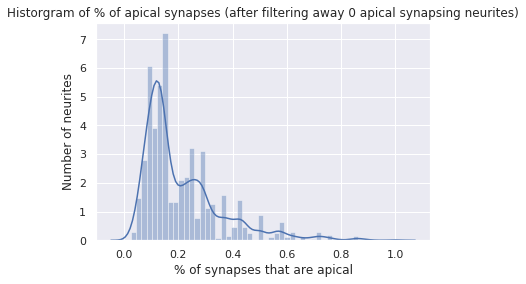

In [9]:
#show the distribution
apical_prop = neurite_targets_no_spine_6.fetch("apical_prop")
apical_greater_0_array = apical_prop[apical_prop.astype("float") > 0]
ax = sns.distplot(apical_greater_0_array.astype("float"))
ax.set(title="Historgram of % of apical synapses (after filtering away 0 apical synapsing neurites)",
      xlabel="% of synapses that are apical",ylabel = "Number of neurites")
print(f"Number of axons with at least 1 apical synapse = {len(apical_greater_0_array)}, perc = {len(apical_greater_0_array)/len(neurite_targets_no_spine_6)} ")

Number of Neurites with at least 1 basal synapse = 11156, perc = 0.9787682049482366 


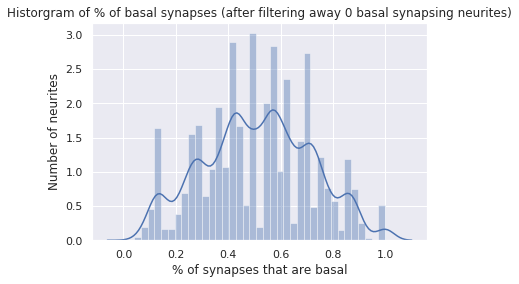

In [10]:
#show the distribution
basal_prop = (neurite_targets_no_spine_6 ).fetch("basal_prop")
basal_greater_0_array = basal_prop[basal_prop.astype("float") > 0]
ax = sns.distplot(basal_greater_0_array.astype("float"))


ax.set(title="Historgram of % of basal synapses (after filtering away 0 basal synapsing neurites)",
       xlabel="% of synapses that are basal",ylabel = "Number of neurites")
print(f"Number of Neurites with at least 1 basal synapse = {len(basal_greater_0_array)}, perc = {len(basal_greater_0_array)/len(neurite_targets_no_spine_6)} ")

/usr/local/lib/python3.6/dist-packages/datajoint/connection.py:150: UserWarning: Mysql server has gone away. Reconnecting to the server.
  warnings.warn("Mysql server has gone away. Reconnecting to the server.")


Number of Neurites with at least 1 oblique synapse = 5934, perc = 0.5206176522196877 


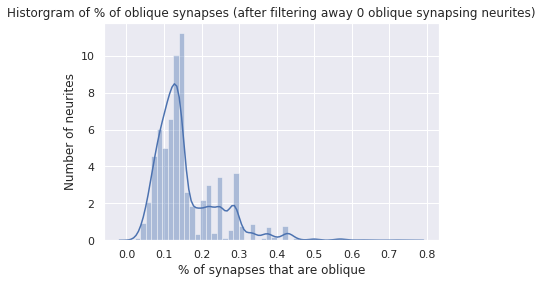

In [11]:
#show the distribution
oblique_prop = (neurite_targets_no_spine_6 ).fetch("oblique_prop")
oblique_greater_0_array = oblique_prop[oblique_prop.astype("float") > 0]
ax = sns.distplot(oblique_greater_0_array.astype("float"))


ax.set(title="Historgram of % of oblique synapses (after filtering away 0 oblique synapsing neurites)",
       xlabel="% of synapses that are oblique",ylabel = "Number of neurites")
print(f"Number of Neurites with at least 1 oblique synapse = {len(oblique_greater_0_array)}, perc = {len(oblique_greater_0_array)/len(neurite_targets_no_spine_6)} ")

In [12]:
# -- Take a small group that has a large proportion and see what contact fingerprint looks like -- #

# DOES THE HISTOGRAM CLUSTERING FOR THE SPINES

In [ ]:
#creates the table with spine data without the spine label
#how to filter out the spine proportion

#have to first remove the ones that have only spine synapses


neurite_targets_no_spine = (pinky.NeuriteTargetsRevised() & "(spine_num + spine_neck_num) <total").proj(
                                                         spine_head_prop="spine_head_prop/(1-spine_prop - spine_neck_prop)",
                                                         shaft_prop="shaft_prop/(1-spine_prop - spine_neck_prop)",
                                                         #non_spine_prop="non_spine_prop/(1-spine_prop - spine_neck_prop)",
                                                         soma_prop = "soma_prop/(1-spine_prop - spine_neck_prop)",
                                                         axon_prop = "axon_prop/(1-spine_prop - spine_neck_prop)",
                                                         total="total-spine_num - spine_neck_num",
                                            )

neurite_targets_no_spine



In [ ]:
#different lengths based on the number of synapses threshold

print(len(neurite_targets_no_spine))
print(len(neurite_targets_no_spine & "total>12"))
print(len(neurite_targets_no_spine & "total>10")) 
print(len(neurite_targets_no_spine & "total>8")) 
print(len(neurite_targets_no_spine & "total>6")) 

In [ ]:
neurite_targets_no_spine_6 = (neurite_targets_no_spine & "total>6")
print("Total in neurite table with greater than 6 synapses = " + str(len(neurite_targets_no_spine_6)))

In [ ]:
#show the distribution
axon_prop = neurite_targets_no_spine_6.fetch("axon_prop")
axon_prop
axon_greater_0_array = axon_prop[axon_prop.astype("float") > 0]
ax = sns.distplot(axon_greater_0_array.astype("float"))
ax.set(title="Historgram of % of axon synapses (after filtering away 0 axon synapsing neurites)",
      xlabel="% of synapses that are axons",ylabel = "Number of neurites")
print(f"Number of axons with at least 1 Axon synapse = {len(axon_greater_0_array)}, perc = {len(axon_greater_0_array)/len(neurite_targets_no_spine_6)} ")

In [ ]:
#show the distribution
soma_prop = (neurite_targets_no_spine_6 ).fetch("soma_prop")
soma_prop
soma_greater_0_array = soma_prop[soma_prop.astype("float") > 0]
ax = sns.distplot(soma_greater_0_array.astype("float"))


ax.set(title="Historgram of % of soma synapses (after filtering away 0 soma synapsing neurites)",
       xlabel="% of synapses that are soma",ylabel = "Number of neurites")
print(f"Number of Neurites with at least 1 Soma synapse = {len(soma_greater_0_array)}, perc = {len(soma_greater_0_array)/len(neurite_targets_no_spine_6)} ")

In [ ]:
#manually find the groups
""
axon_group = neurite_targets_no_spine_6 & "axon_prop>0"
print("Axon group = " + str(len(axon_group)))
soma_group = (neurite_targets_no_spine_6 - axon_group.proj()) & "soma_prop>=0.25"
print("Soma group = " + str(len(soma_group)))

In [ ]:
#show the distribution
spine_head_prop = (neurite_targets_no_spine_6 ).fetch("spine_head_prop")
spine_head_prop
spine_head_greater_0_array = spine_head_prop[spine_head_prop.astype("float") > 0]
ax = sns.distplot(spine_head_greater_0_array.astype("float"))


ax.set(title="Historgram of % of spine_head synapses (after filtering away 0 spine_head synapsing neurites)",
       xlabel="% of synapses that are spine_head",ylabel = "Number of neurites")
print(f"Number of Neurites with at least 1 spine_head synapse = {len(spine_head_greater_0_array)}, perc = {len(spine_head_greater_0_array)/len(neurite_targets_no_spine_6)} ")

In [ ]:
#show the distribution
shaft_prop = (neurite_targets_no_spine_6 ).fetch("shaft_prop")
shaft_greater_0_array = shaft_prop[shaft_prop.astype("float") > 0]
ax = sns.distplot(shaft_greater_0_array.astype("float"))


ax.set(title="Historgram of % of shaft synapses (after filtering away 0 shaft synapsing neurites)",
       xlabel="% of synapses that are shaft",ylabel = "Number of neurites")
print(f"Number of Neurites with at least 1 shaft synapse = {len(shaft_greater_0_array)}, perc = {len(shaft_greater_0_array)/len(neurite_targets_no_spine_6)} ")

In [ ]:
#remove the axon and soma groups
neurite_targets_no_spine_6_without_axon_soma = neurite_targets_no_spine_6 - axon_group.proj() - soma_group.proj()
len(neurite_targets_no_spine_6_without_axon_soma)/len(neurite_targets_no_spine_6)

In [ ]:
#get heatmap of the data

neurite_spine_data = neurite_targets_no_spine_6_without_axon_soma.fetch(as_dict=True)

spine_df = pd.DataFrame(neurite_spine_data)
spine_df_base = spine_df.drop(columns=['segmentation', 'segment_id',"total","axon_prop","soma_prop"])
#spine_df_base

In [ ]:
#sort by the first column and then do heat map
spine_df_base_head_shaft_sort = spine_df_base.sort_values(['spine_head_prop','shaft_prop'], ascending=[False,True])
spine_df_base_head_shaft_sort

In [ ]:
#making the head group
head_group = neurite_targets_no_spine_6_without_axon_soma & "spine_head_prop >=0.6"
len(head_group)

In [ ]:
#making the shaft group
shaft_group = (neurite_targets_no_spine_6_without_axon_soma & "shaft_prop >=0.5") - head_group.proj()
len(shaft_group)

In [ ]:
unused = neurite_targets_no_spine_6_without_axon_soma - head_group.proj() - shaft_group.proj()

In [ ]:
print(len(soma_group),len(axon_group),len(head_group),len(shaft_group),len(unused))
print(sum([len(soma_group),len(axon_group),len(head_group),len(shaft_group),len(unused)]))

In [ ]:
#look up datajoint table that has the clusters
@schema
class SpineClustersKey(dj.Lookup):
    definition="""
    cluster_id : tinyint unsigned #numeric label of cluster
    ---
    description : varchar(16) #descriptive name of cluster
    threshold   : float #the proportion cut off for the group based on the category
    """
    

In [ ]:
cluster_descriptions = ["Soma","Axon","Spine Head","Shaft","Unused"]
cluster_thresholds = [0.25,0.0001,0.6,0.5,0]

clusters_dict = [dict(cluster_id=i,description=cd,threshold=ct) for i,(cd,ct) in enumerate(zip(cluster_descriptions,cluster_thresholds))]
clusters_dict

SpineClustersKey.insert(clusters_dict,skip_duplicates=True)

In [ ]:
SpineClustersKey()

In [ ]:
## Creates the table that holds all of the segment groups
@schema
class SpineClusters(dj.Manual):
    definition="""
    -> pinky.NeuriteRevised
    ---
    ->SpineClustersKey
    """

In [ ]:
possible_groups = [soma_group,axon_group,head_group,shaft_group,unused]
descriptors = [0,1,2,3,4]
for i,table in enumerate(possible_groups):
    new_table = table.proj(cluster_id=str(descriptors[i]))
    SpineClusters.insert(new_table,skip_duplicates=True)
    

In [ ]:
(len(SpineClusters() & "cluster_id=0"),len(SpineClusters() & "cluster_id=1"),
 len(SpineClusters() & "cluster_id=2"),len(SpineClusters() & "cluster_id=3"),
 len(SpineClusters() & "cluster_id=4"))

In [ ]:
print(len(soma_group),len(axon_group),len(head_group),len(shaft_group),len(unused))
print(sum([len(soma_group),len(axon_group),len(head_group),len(shaft_group),len(unused)]))

# SEE IF ADDING CONTACTS THRESHOLD WOULD AFFECT MUCH 

In [ ]:
pinky_fc = dj.create_virtual_module("pinky_fc","microns_pinky_fc")

In [ ]:
pinky.SpineClusters() #segment ids of the chosen Presyns

In [ ]:
presyn_lengths = dj.U("segment_id").aggr(pinky_fc.ContactPrePost.proj("total_postsyn_length"),summed_postsyn_length="sum(total_postsyn_length)")
presyn_lengths

In [ ]:
length_threshold = 100000
presyn_lengths_with_length_threshold  = presyn_lengths & "summed_postsyn_length>" + str(length_threshold)
presyn_lengths_with_length_threshold

In [ ]:
#now restrict the clustering based on the threshold
presyn_lengths_with_length_threshold.proj("segment_id")